In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Subplots

Plot The distribution of lodging revenue for our top 5 countries by revenue ("PRT, "ESP", "FRA", "DEU", "GBR").

**Limit Data to Bookings with RoomNights < 15**

Make sure to share both x and y axes and give them titles!

Remove the extra chart with `ax[row, col].set_axis_off()` if using plt.subplots().


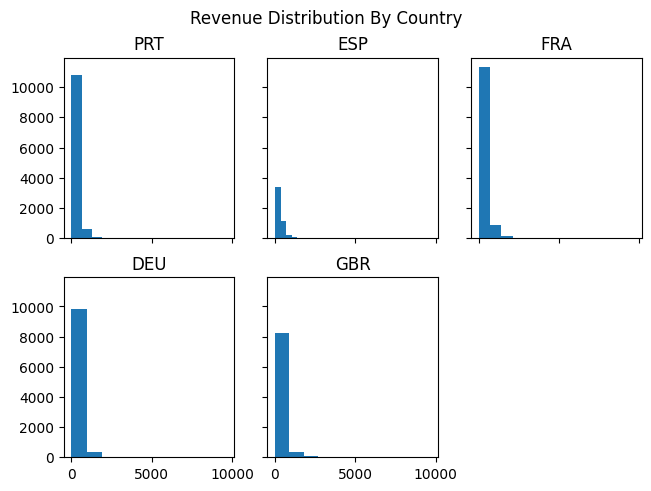

In [6]:
fig, ax = plt.subplots(2, 3, constrained_layout=True, sharex="all", sharey="all")

fig.suptitle("Revenue Distribution By Country")

ax[0][0].hist(
    hotels.query("Nationality == 'PRT' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][0].set_title("PRT")

ax[0][1].hist(
    hotels.query("Nationality == 'ESP' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][1].set_title("ESP")

ax[0][2].hist(
    hotels.query("Nationality == 'FRA' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[0][2].set_title("FRA")

ax[1][0].hist(
    hotels.query("Nationality == 'DEU' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][0].set_title("DEU")

ax[1][1].hist(
    hotels.query("Nationality == 'GBR' and RoomNights < 15").loc[:, "LodgingRevenue"]
)
ax[1][1].set_title("GBR")

ax[1, 2].set_axis_off()

AttributeError: 'GrouperView' object has no attribute 'join'

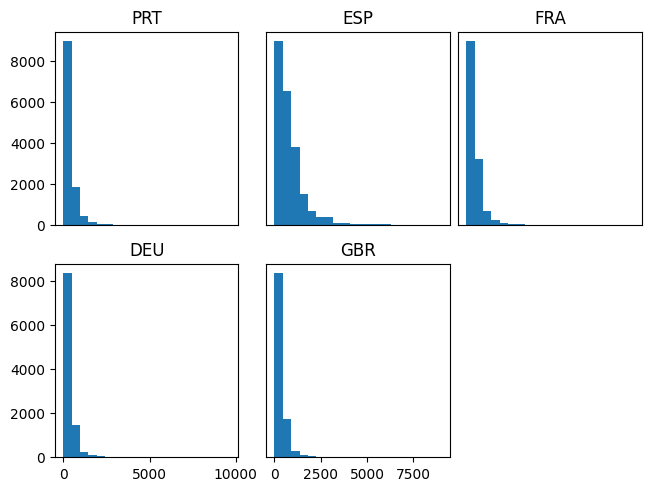

In [7]:
# Alternate Solution - Iterate and Add

country_list = ["PRT", "ESP", "FRA", "DEU", "GBR"]

ax_list = []

nrows, ncols = (2, 3)

fig = plt.figure(constrained_layout=True)

for i, country in enumerate(country_list):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.hist(
        (hotels
         .query(f"Nationality == '{country}' & RoomNights < 15")
         .loc[ :, "LodgingRevenue"]),
        bins=20,
    )

    ax.set_title(f"{country}")
    ax_list.append(ax)

    if i % ncols != 0:
        ax.set_yticks([])
    
    if (i / ncols) < nrows - 1 :
        ax.set_xticks([])

ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

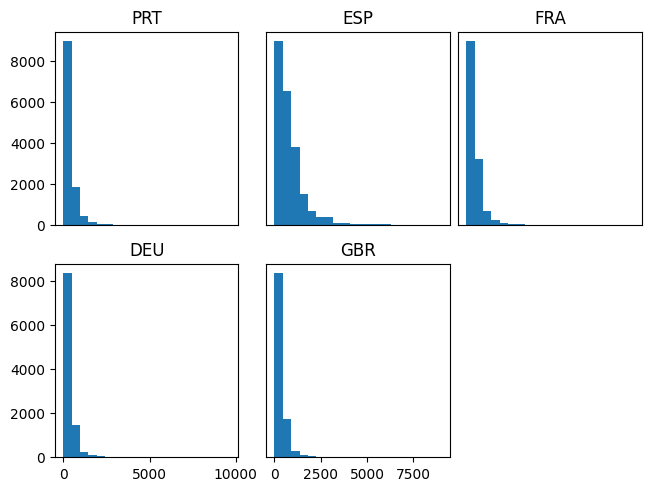

In [8]:
country_list = ["PRT", "ESP", "FRA", "DEU", "GBR"]

nrows, ncols = (2, 3)

fig = plt.figure(constrained_layout=True)

ax_list = []

for i, country in enumerate(country_list):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    ax.hist(
        hotels.query(f"Nationality == '{country}' & RoomNights < 15")["LodgingRevenue"],
        bins=20,
    )

    ax.set_title(f"{country}")
    ax_list.append(ax)

    # Remove y-ticks for non-leftmost columns
    if i % ncols != 0:
        ax.set_yticks([])
    
    # Remove x-ticks for all but the bottom row
    if i // ncols < nrows - 1:
        ax.set_xticks([])

# Automatically shared axes
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

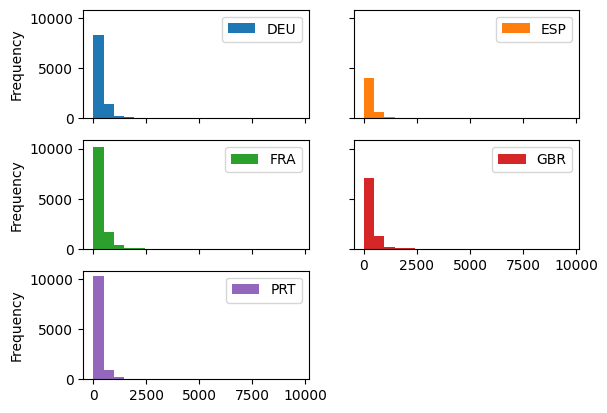

In [9]:
hotel_pivot = (
    hotels
    .query("Nationality in @country_list and RoomNights < 15")
    .pivot_table(
        index="ID",
        columns="Nationality",
        values="LodgingRevenue"
    )
)

# Pandas Plot API
hotel_pivot.plot.hist(subplots=True,
                      bins=20,
                      layout=(3, 2),
                      sharex=True,
                      sharey=True)

# GridSpec

* Build a Gridspec layout with a line chart plotting Lodging Revenue Vs. Hotel Revenue for all countries at the top of your report.

* Build a bar chart of total revenue (Lodging + Other Revenue) by country for our top 5 countries

* Build a Donut Chart Specifying 67% of the way to our Goal of French Revenue for the year

In [10]:
# Line Chart Data Prep

hotels = hotels.assign(
    date=pd.to_datetime("2018-12-31") - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D"),
    total_revenue=hotels["LodgingRevenue"] + hotels["OtherRevenue"],
)


monthly_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue": "sum", "OtherRevenue": "sum", "total_revenue": "sum"})
    .resample("M")
    .sum()
)

monthly_revenue.head()

/var/folders/bm/h1t1wfk16y5gv2b9svjm7mzw0000gn/T/ipykernel_16285/2367231643.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [11]:
# Bar Chart Data
rev_by_country = (
    hotels.groupby("Nationality")
    .agg({"total_revenue": "sum"})
    .sort_values("total_revenue", ascending=False)
    .iloc[:5]
)

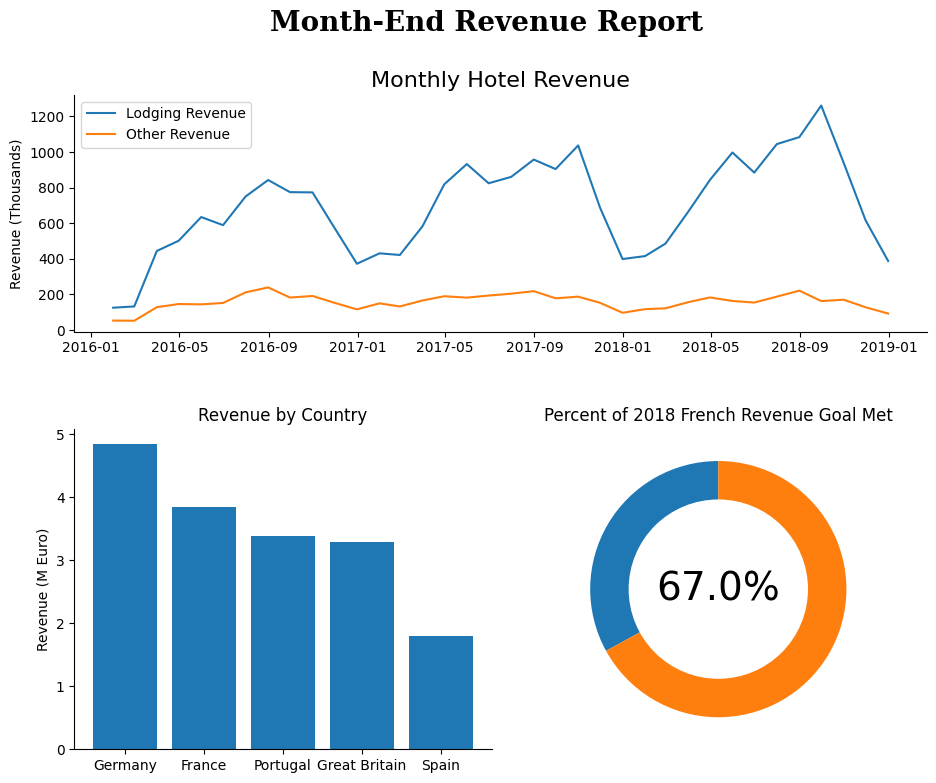

In [12]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(11, 8.5))

gs = gridspec.GridSpec(nrows=8, ncols=8)

fig.suptitle(
    "Month-End Revenue Report", fontsize=20, fontweight="bold", fontfamily="serif"
)

ax1 = fig.add_subplot(gs[0:3, :])

ax1.plot(
    monthly_revenue.index,
    monthly_revenue["LodgingRevenue"] / 1000,
    label="Lodging Revenue",
)

ax1.plot(
    monthly_revenue.index, 
    monthly_revenue["OtherRevenue"] / 1000, 
    label="Other Revenue"
)

ax1.set_title("Monthly Hotel Revenue", fontsize=16)
ax1.set_ylabel("Revenue (Thousands)")

ax1.legend(loc="upper left")

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

# Bar Chart
ax2 = fig.add_subplot(gs[4:, :4])

ax2.bar(
    x=rev_by_country.index, 
    height=rev_by_country["total_revenue"] / 1000000,
)

ax2.set_title("Revenue by Country")
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(["Germany", "France", "Portugal", "Great Britain", "Spain"])
ax2.set_ylabel("Revenue (M Euro)")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)

# Pie Chart

ax3 = fig.add_subplot(gs[4:, 4:])

pie_list = [0.33, 0.67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=["", ""],
    # autopct='%.0f%%',
    pctdistance=0.85,
)

hole = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(hole)
plt.text(
    0, 0, 
    f"{pie_list[1] * 100}%", 
    ha="center", 
    va="center", 
    fontsize=28
)

ax3.set_title("Percent of 2018 French Revenue Goal Met", fontsize=12)

plt.show()

# Assignment 3: Colors

* Apply the Set2 Colormap to the line chart.
* Look up the national colors of our top 5 countries and color each bar in the bar chart accordingly. The hex codes for colors can be looked up at https://flagcolor.com/.
* Finally, make the donut chart French Blue, and white out the secondary slice.

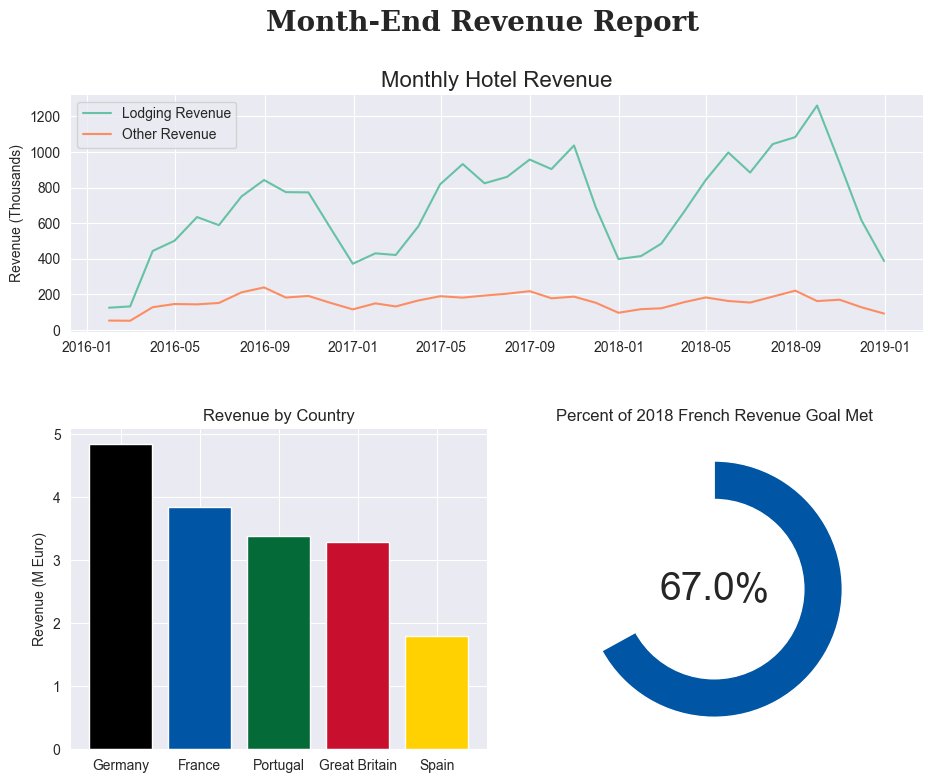

In [20]:
# Set Style (for assignment 4)
import seaborn as sns
sns.set_style("darkgrid")


plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Set2.colors)

fig = plt.figure(figsize=(11, 8.5))

fig.suptitle(
    "Month-End Revenue Report", fontsize=20, fontweight="bold", fontfamily="serif"
)

ax1 = fig.add_subplot(gs[0:3, :])

ax1.plot(
    monthly_revenue.index,
    monthly_revenue["LodgingRevenue"] / 1000,
    label="Lodging Revenue",
)

ax1.plot(
    monthly_revenue.index, 
    monthly_revenue["OtherRevenue"] / 1000, 
    label="Other Revenue"
)

ax1.set_title("Monthly Hotel Revenue", fontsize=16)
ax1.set_ylabel("Revenue (Thousands)")
ax1.legend(loc="upper left")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)


ax2 = fig.add_subplot(gs[4:, :4])

colors = ["black", "#0055A4", "#046A38", "#C8102E", "#FFD100"]


ax2.set_title("Revenue by Country")

ax2.bar(
    x=rev_by_country.index,
    height=rev_by_country["total_revenue"] / 1000000,
    color=colors,
)

ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(["Germany", "France", "Portugal", "Great Britain", "Spain"])
ax2.set_ylabel("Revenue (M Euro)")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)


ax3 = fig.add_subplot(gs[4:, 4:])

pie_list = [0.33, 0.67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=["", ""],
    # autopct='%.0f%%',
    pctdistance=0.85,
    colors=["white", "#0055A4"],
)

hole = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(hole)

plt.text(
    0, 0, 
    f"{pie_list[1] * 100}%", 
    ha="center", 
    va="center", 
    fontsize=28
)


ax3.set_title("Percent of 2018 French Revenue Goal Met", fontsize=12)

plt.show()

# Assignment 4: Stylesheets 

* Apply a style to the above code